# Euro S&P 2017: Block me if you can! - Dataset

The following notebook includes some examples on how to work with the dataset from our paper:

*Merzdovnik, G., Huber, M., Buhov, D., Nikiforakis, N., Neuner, S., Schmiedecker, M., & Weippl, E. (2017). [Block me if you can: A large-scale study of tracker-blocking tools](https://www.markushuber.org/pub/blockme.pdf). In Proceedings of the 2nd IEEE European Symposium on Security and Privacy (IEEE EuroS&P).*


## Effectiveness of tracker-blocking browser extensions 
#### 3rdparty_web_inclusions.csv
Total sample size: **123,876** websites of Alexa Top 200k

### Third-party service inclusions and their reduction per plugin (per cent)

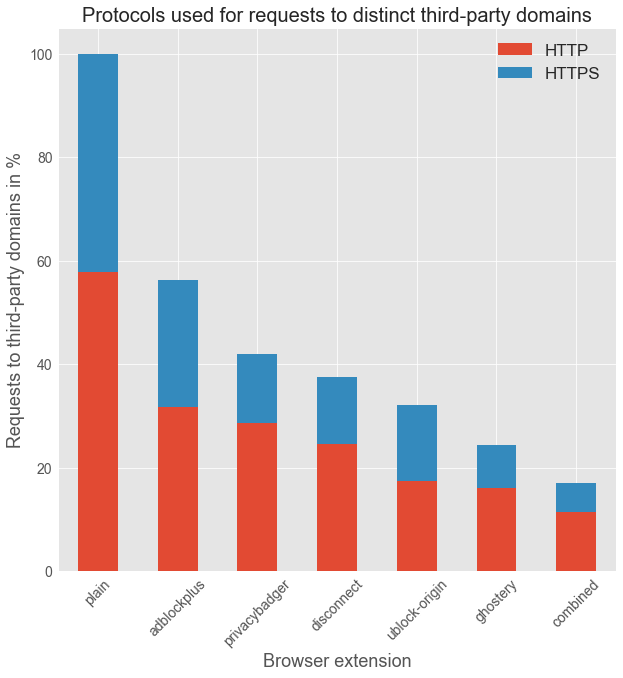

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

idf = pd.read_csv('data/3rdparty_web_inclusions.csv')
# Create sum of HTTP and HTTPS requests per plugin
proto_sums = idf.drop('subdomain', 1).drop('domain', 1).sum()
# Dataframe with requests per protocol
proto_sums.index = proto_sums.index.str.split(pat='_', expand=True)
df = proto_sums.unstack(1)

# Total number of inclusions in plain profile
total_plain_inclusions = (df.loc['plain'].http + df.loc['plain'].https)
# Calculate percentage of remaining inclusions relative to total plain inclusions
df['http_percent'] = df['http'] / total_plain_inclusions * 100
df['https_percent'] = df['https'] / total_plain_inclusions * 100

#Create new dataframe sorted by remaining inclusions [per cent]
df_sorted_percent = df[['http_percent', 'https_percent']].sort_values(by=['http_percent', 'https_percent'], ascending=False)

# Create stacked plot
barplot = df_sorted_percent.plot.bar(stacked=True, figsize=[10,10], fontsize=14, rot=45)
# Label the plot
barplot.set_title('Protocols used for requests to distinct third-party domains', fontsize=20)
barplot.set_xlabel('Browser extension', fontsize=18)
barplot.set_ylabel('Requests to third-party domains in %', fontsize=18)
barplot.legend(('HTTP','HTTPS'),fontsize=17)


### Explore blindspots of specific extensions

#### Which domains where blocked by Ghostery but not by PrivacyBadger?

In [221]:
import pandas as pd

idf = pd.read_csv('data/3rdparty_web_inclusions.csv')

# Filter dataframe for domains where ghostery blocked all domains
gh = idf[(idf.ghostery_http == 0) & (idf.ghostery_https == 0)]

# Create a dataframe with ghostery and privacybadger data
pb_gh = gh[['domain', 'subdomain', 'privacybadger_http', 'privacybadger_https', 'ghostery_http', 'ghostery_https']].sort_values(by=['privacybadger_http', 'privacybadger_https'], ascending=False)

# Only output domains with more than 100 inclusions for privacybadger
pb_gh[pb_gh.privacybadger_http + pb_gh.privacybadger_https > 100].head(10)

,domain,subdomain,privacybadger_http,privacybadger_https,ghostery_http,ghostery_https
38946,yldbt.com,ads-adswest,353.0,1.0,0.0,0.0
36665,atemda.com,NaN,352.0,130.0,0.0,0.0
47640,myfonts.net,hello,347.0,186.0,0.0,0.0
40893,bkrtx.com,tags,314.0,140.0,0.0,0.0
27391,contextweb.com,bid,296.0,281.0,0.0,0.0
49276,adsniper.ru,sync3,290.0,11.0,0.0,0.0
31132,adsnative.com,api,280.0,16.0,0.0,0.0
31133,adsnative.com,bevo-us-east-1,274.0,17.0,0.0,0.0
40142,tailtarget.com,d,268.0,9.0,0.0,0.0
31058,gumgum.com,g2,267.0,318.0,0.0,0.0


#### Which domains are blocked by all browser extensions (combined) and are missed by ublock-origin?

In [168]:
import pandas as pd

idf = pd.read_csv('data/3rdparty_web_inclusions.csv')

# Filter dataframe for domains where ghostery blocked all domains
co = idf[(idf.combined_http == 0) & (idf.combined_https == 0)]

# Create a dataframe to see where ghostery blocked a domain while privacybadger did not
co_uo = co[['domain', 'subdomain', 'ublock-origin_http', 'ublock-origin_https', 'combined_http', 'combined_https']].sort_values(by=['ublock-origin_http', 'ublock-origin_https'], ascending=False)

# Output top 10 third-party domains
co_uo.head(10)

,domain,subdomain,ublock-origin_http,ublock-origin_https,combined_http,combined_https
7991,facebook.net,connect,11790.0,23016.0,0.0,0.0
7951,facebook.com,staticxx,3531.0,28097.0,0.0,0.0
27574,pinterest.com,assets,2822.0,372.0,0.0,0.0
27509,linkedin.com,platform,1245.0,1618.0,0.0,0.0
35261,sumome.com,load,988.0,218.0,0.0,0.0
27532,typekit.net,use,985.0,2809.0,0.0,0.0
35262,sumome.com,NaN,968.0,198.0,0.0,0.0
38975,kxcdn.com,sumome-140a,915.0,177.0,0.0,0.0
22018,baidu.com,bdimg.share,773.0,0.0,0.0,0.0
27577,pinterest.com,api,697.0,232.0,0.0,0.0


## Android Dataset
#### 3rdparty_android.csv
Total sample size: **9061** Android apps

### 10 most popular thirdparty domains in Android sample and the protocol they use

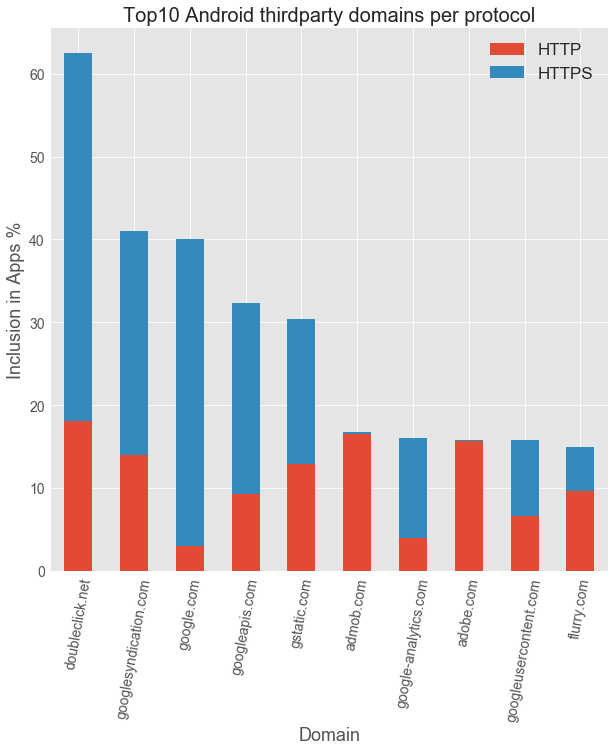

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

adf = pd.read_csv('data/3rdparty_android.csv')
total_samples = 9061

# Sum data by domains, calculate total HTTP/HTTPS per centages
domains = adf.groupby('domain').sum()
domains['http'] = ( domains['plain_http'] / total_samples) * 100
domains['https'] = ( domains['plain_https'] / total_samples) * 100
domains['total'] = domains['http'] + domains['https']

# Top10 domains sorted by total inclusions in apps
top10 = domains.sort_values(by=['total'], ascending=False).head(10).filter(items=['http','https'])

# Create stacked bar plot
top10_ax = top10.plot.bar(figsize=(10,10),rot=80, stacked=True, fontsize=14)
# Label the plot
top10_ax.set_title('Top10 Android thirdparty domains per protocol', fontsize=20)
top10_ax.set_xlabel('Domain', fontsize=18)
top10_ax.set_ylabel('Inclusion in Apps %', fontsize=18)
top10_ax.legend(('HTTP','HTTPS'),fontsize=17)

## (CPU/Memory) overhead of browser extensions
#### extension_overhead.csv

### Impact of browser extensions on CPU consumption

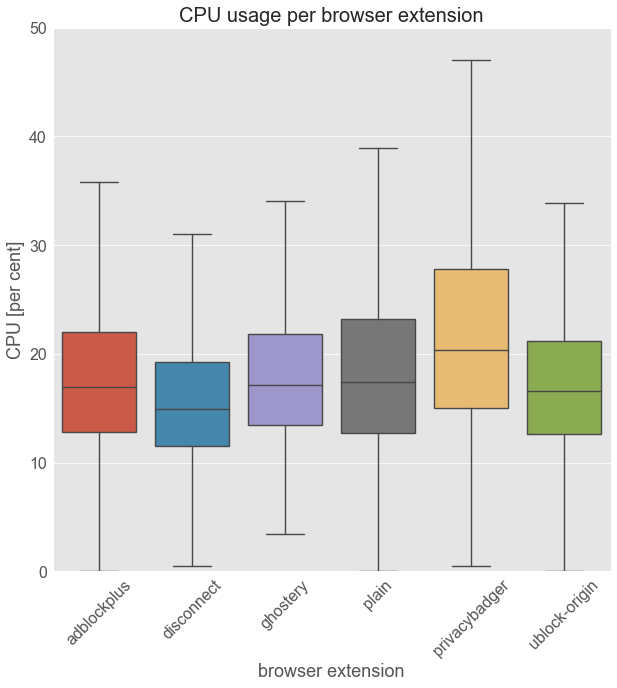

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('data/extension_overhead.csv')

# Create CPU boxplot
sns.set_context("paper",font_scale=2)
plt.figure(figsize=[10,10])
plt.xticks(rotation=45)
cpu_fig = sns.boxplot(y="cpu", x="profile", data=df, fliersize=0)

# Plot labels and formatting
cpu_fig.set_ylim(0, 50)
cpu_fig.set_title('CPU usage per browser extension',fontsize= 20)
cpu_fig.set_xlabel('browser extension',fontsize = 18)
cpu_fig.set_ylabel('CPU [per cent]', fontsize = 18)


### Memory consumption per browser extension

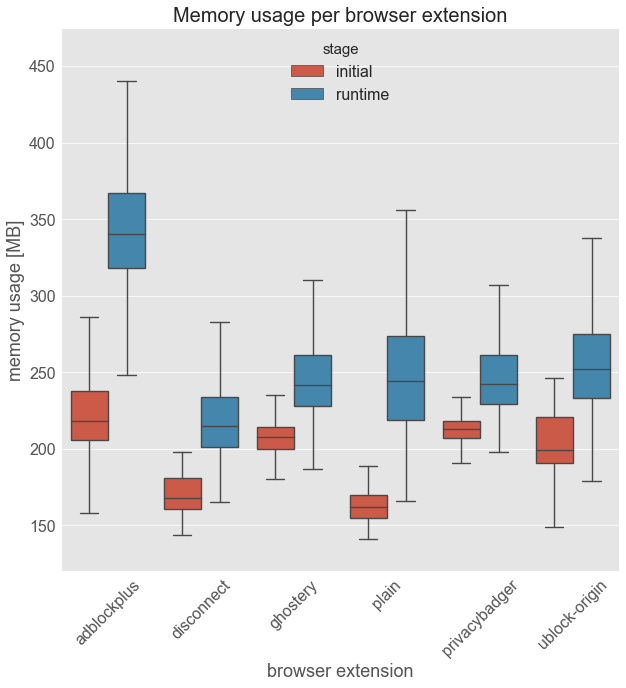

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('data/extension_overhead.csv')
# Drop CPU column and rename memory columns
df = df.drop('cpu',1)
df.columns = ['browser extension', 'initial', 'runtime']
# Create memory dataframe for plotting
mem = pd.melt(df, id_vars=['browser extension'],value_name='memory', var_name='stage', value_vars=['initial', 'runtime'])

# Plot grouped boxplot
sns.set_context("paper",font_scale=2)
plt.figure(figsize=[10,10])
plt.xticks(rotation=45)
mem_fig = sns.boxplot(y="memory", x="browser extension", hue='stage', data=mem, fliersize=0)

# Labels and formatting
mem_fig.set_ylim(120, 475)
mem_fig.set_title('Memory usage per browser extension',fontsize= 20)
mem_fig.set_xlabel('browser extension',fontsize = 18)
mem_fig.set_ylabel('memory usage [MB]', fontsize = 18)
